In [1]:
import sys
import re
from tqdm import tqdm

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from collections import Counter
from joypy import joyplot

sys.path.append("../")
from calculus_path_mod.term_engine import *
from calculus_path_mod.reduction_strategy import *
from calculus_path_mod.terms import num_comparison, nat_numbers, arithm_ops, combinators, pairs, logic
from calculus_path_mod.terms.pseudonym import *

from calculus_path_mod.json_serialization import load_terms
from fitter import Fitter, get_common_distributions
from calculus_utils.drawing import draw_steps_displot

# Load Terms filtered LO

In [2]:
terms_LO = load_terms("../tests_11_retests/terms_210_filtered_LO.dat")
# terms_RI = load_terms("../tests_11_retests/terms_210_filtered_RI.dat")

# Collect normalization process data for LO-strategy & LI-strategy with tLO

In [3]:
def gen_norm_data(terms_list, strategy):
    steps = []
    for term in tqdm(terms_list):
        try:
            norm_data = term.normalize_with_params(strategy)
            steps.append(norm_data)
        except Exception:
            steps.append(None)
    return steps

In [4]:
data_LO = gen_norm_data(terms_LO, LOStrategy())
data_LI = gen_norm_data(terms_LO, LIStrategy())

100%|██████████| 226/226 [10:49<00:00,  2.88s/it] 


# Visualize distribution with Ridge Plot

In [5]:
data_vis_LO = {"step": [], "step_count": [],
               "count_terms": [], "vertices": [], "redexes": [], "redex_depths": [],
               "redex_indexes": [], "heights": [], "widths": [], "steps_time": []}

params_lst = ["vertices", "redexes", "redex_depths", "redex_indexes", "heights", "widths", "steps_time"]
steps_lst = list(range(max([len(record["vertices"]) for record in data_LO])))

for step_no in steps_lst:
    count_terms = 0
    for term_params in data_LO:
        if term_params and step_no < len(term_params["vertices"]):
            count_terms += 1

    for term_params in data_LO:
        if term_params and step_no < len(term_params["vertices"]):
            for key_ in params_lst:
                data_vis_LO[key_].append(term_params[key_][step_no])
            data_vis_LO["step"].append(step_no)
            data_vis_LO["count_terms"].append(count_terms)
            data_vis_LO["step_count"].append(f"{step_no}) -> [{count_terms}]")

In [6]:
data_vis_LI = {"step": [], "step_count": [],
               "count_terms": [], "vertices": [], "redexes": [], "redex_depths": [],
               "redex_indexes": [], "heights": [], "widths": [], "steps_time": []}

params_lst = ["vertices", "redexes", "redex_depths", "redex_indexes", "heights", "widths", "steps_time"]
steps_lst = list(range(max([len(record["vertices"]) for record in data_LI if record])))

for step_no in steps_lst:
    count_terms = 0
    for term_params in data_LI:
        if term_params and step_no < len(term_params["vertices"]):
            count_terms += 1

    for term_params in data_LI:
        if term_params and step_no < len(term_params["vertices"]):
            for key_ in params_lst:
                data_vis_LI[key_].append(term_params[key_][step_no])
            data_vis_LI["step"].append(step_no)
            data_vis_LI["count_terms"].append(count_terms)
            data_vis_LI["step_count"].append(f"{step_no}) -> [{count_terms}]")

In [7]:
data_vis_LO_dct = data_vis_LO
data_vis_LI_dct = data_vis_LI

data_vis_LO = pd.DataFrame(data_vis_LO)
data_vis_LI = pd.DataFrame(data_vis_LI)

# "vertices"
# "redexes"
# "redex_depths"
# "redex_indexes"
# "heights"
# "widths"
# "steps_time"

In [22]:
def draw_single_ridgeline_plot(
        data_vis, data_decr="LO norm",
        fist_step_no=0, last_step_no=20,
        vis_data_name="vertices", vis_data_lim=100,
):
    selected_data = [fist_step_no <= step_no < last_step_no for step_no in data_vis["step"]]
    tmp_data_vis = data_vis[selected_data].copy(deep=True)
    # cat_steps = pd.api.types.CategoricalDtype(list(range(fist_step_no, last_step_no)))
    # tmp_data_vis['step'] = tmp_data_vis['step'].astype(cat_steps)
    cat_steps = []
    for var_ in list(tmp_data_vis['step_count']):
        if var_ not in cat_steps:
            cat_steps.append(var_)
    cat_steps = pd.api.types.CategoricalDtype(cat_steps)
    tmp_data_vis['step_count'] = tmp_data_vis['step_count'].astype(cat_steps)
    if vis_data_lim:
        tmp_data_vis = tmp_data_vis[[rec_ < vis_data_lim for rec_ in tmp_data_vis[vis_data_name]]]

    plt.figure()

    joyplot(
        data=tmp_data_vis[[vis_data_name, 'step_count']],
        by='step_count',
        hist=True,
        bins=100,
        figsize=(12, 8),
    )
    plt.title(f"Ridgeline Plot {vis_data_name} for {data_decr}", fontsize=20)
    plt.show()

<Figure size 640x480 with 0 Axes>

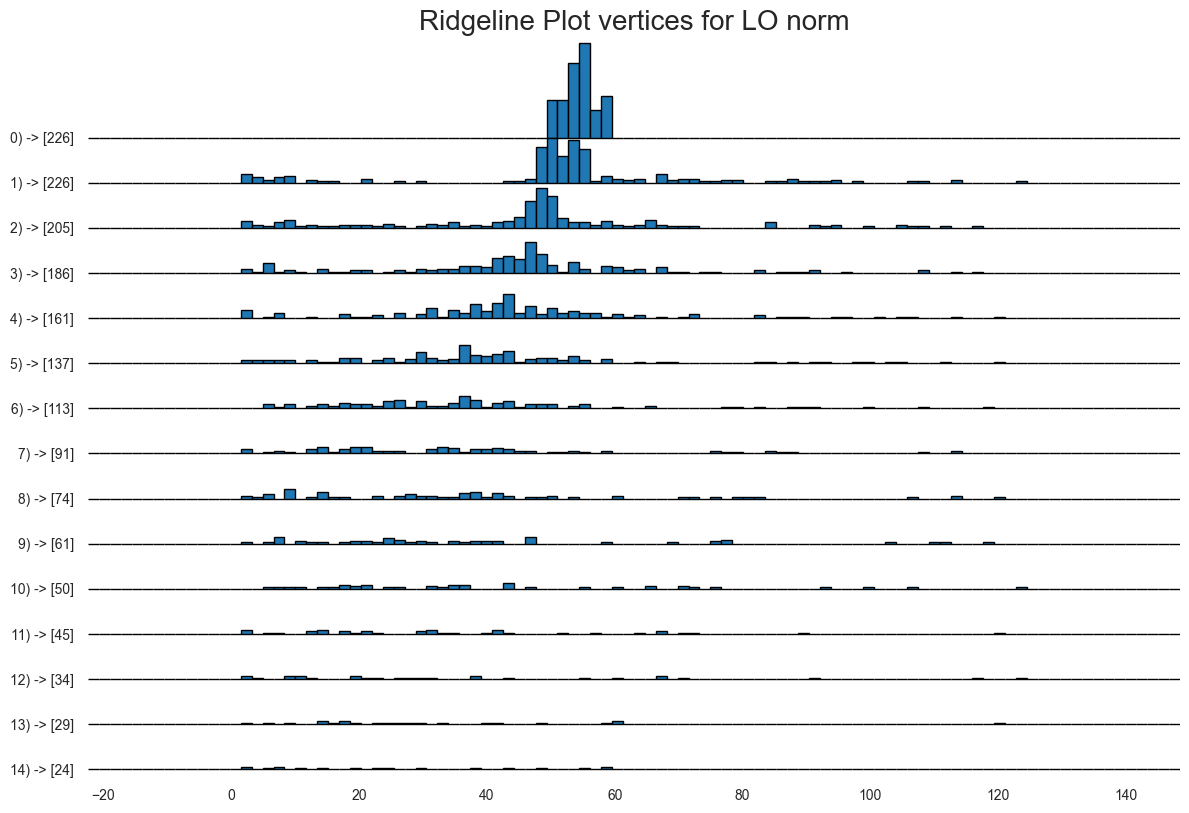

In [25]:
draw_single_ridgeline_plot(
    data_vis=data_vis_LO, data_decr="LO norm",
    fist_step_no=0, last_step_no=15,
    vis_data_name="vertices", vis_data_lim=125,
)

<Figure size 640x480 with 0 Axes>

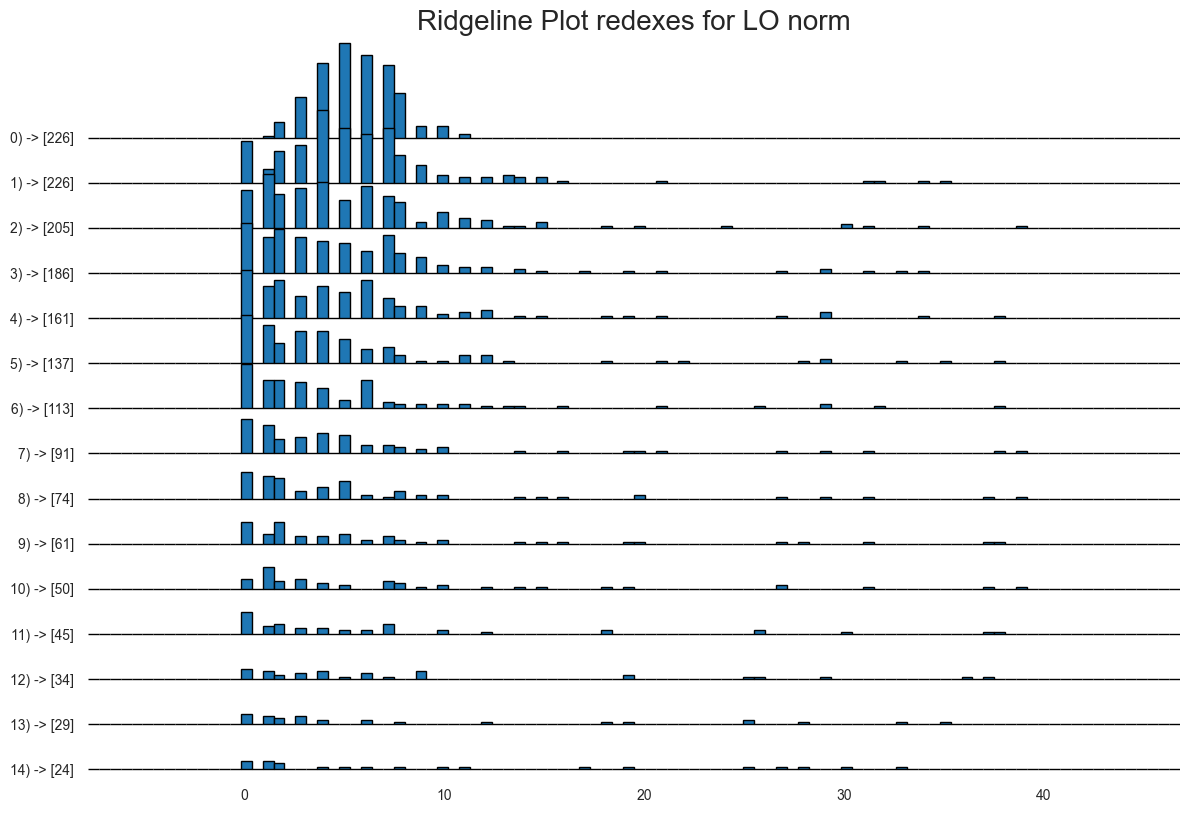

In [28]:
draw_single_ridgeline_plot(
    data_vis=data_vis_LO, data_decr="LO norm",
    fist_step_no=0, last_step_no=15,
    vis_data_name="redexes", vis_data_lim=40,
)

<Figure size 640x480 with 0 Axes>

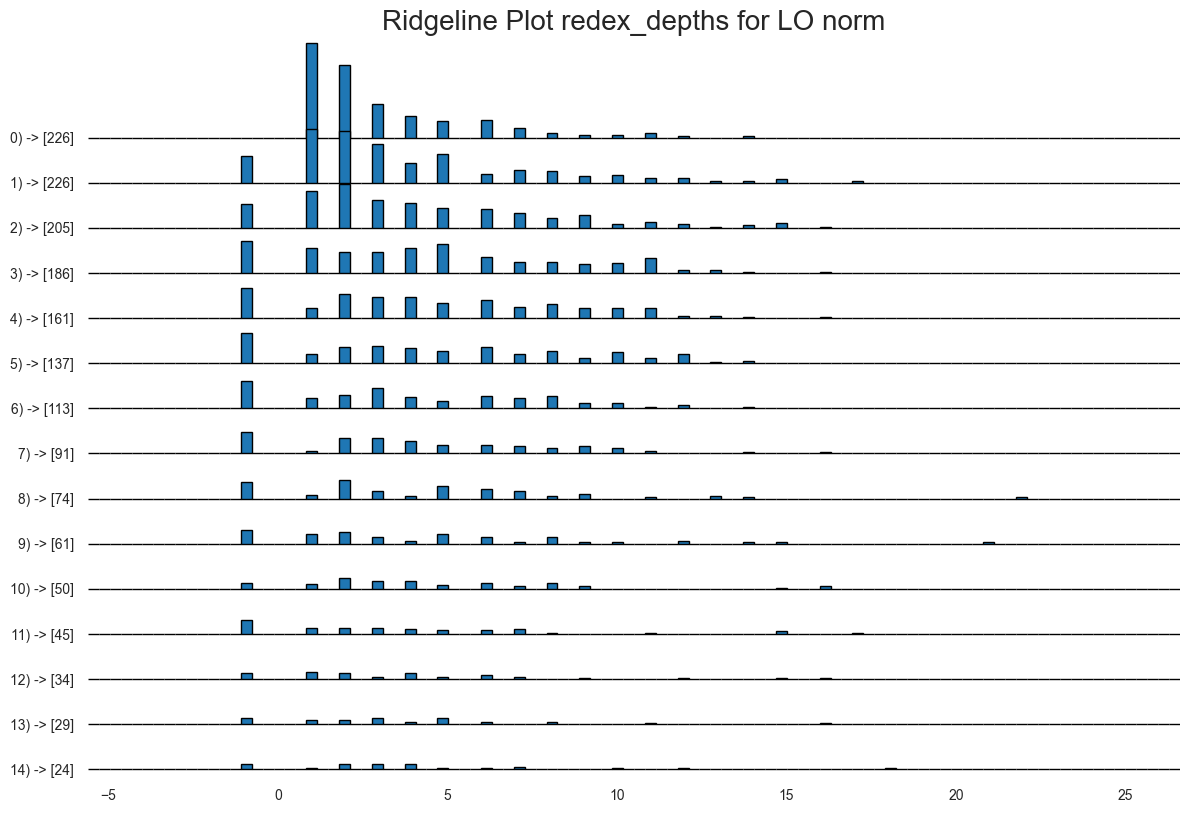

In [30]:
draw_single_ridgeline_plot(
    data_vis=data_vis_LO, data_decr="LO norm",
    fist_step_no=0, last_step_no=15,
    vis_data_name="redex_depths", vis_data_lim=25,
)

<Figure size 640x480 with 0 Axes>

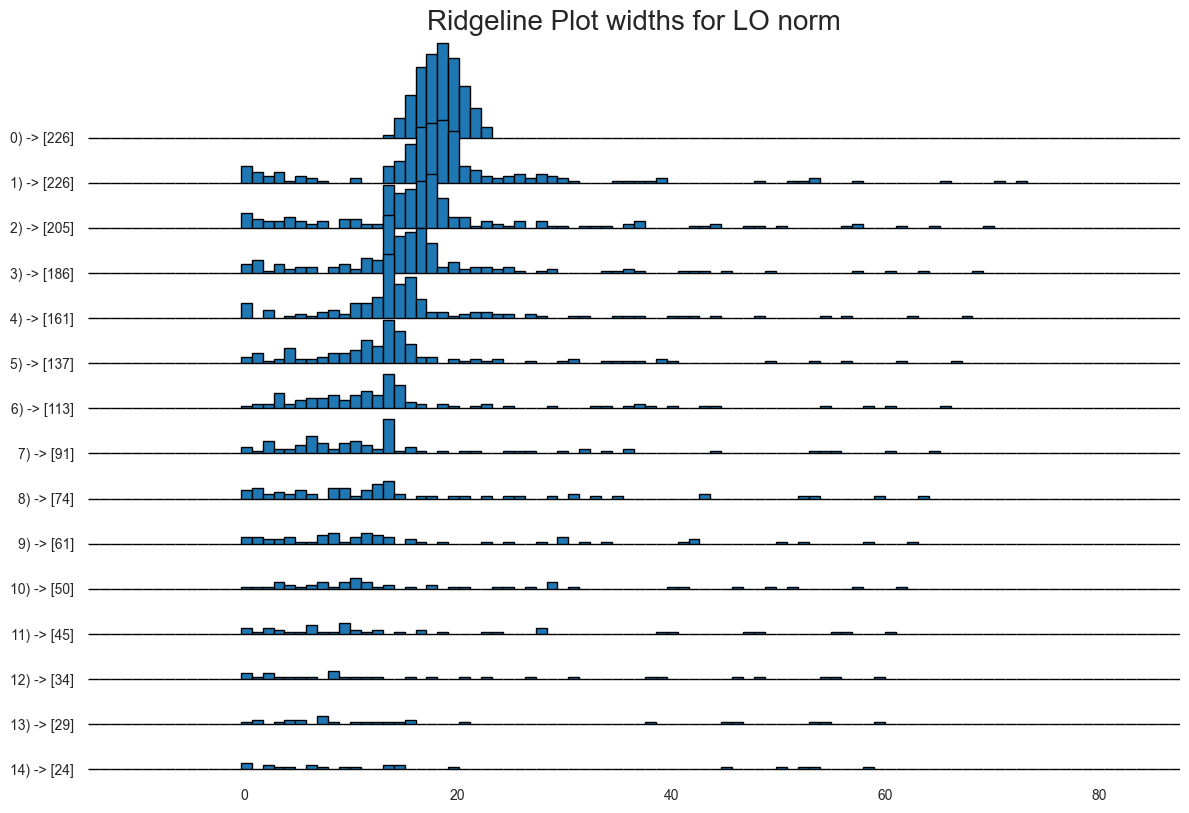

In [32]:
draw_single_ridgeline_plot(
    data_vis=data_vis_LO, data_decr="LO norm",
    fist_step_no=0, last_step_no=15,
    vis_data_name="widths", vis_data_lim=80,
)

<Figure size 640x480 with 0 Axes>

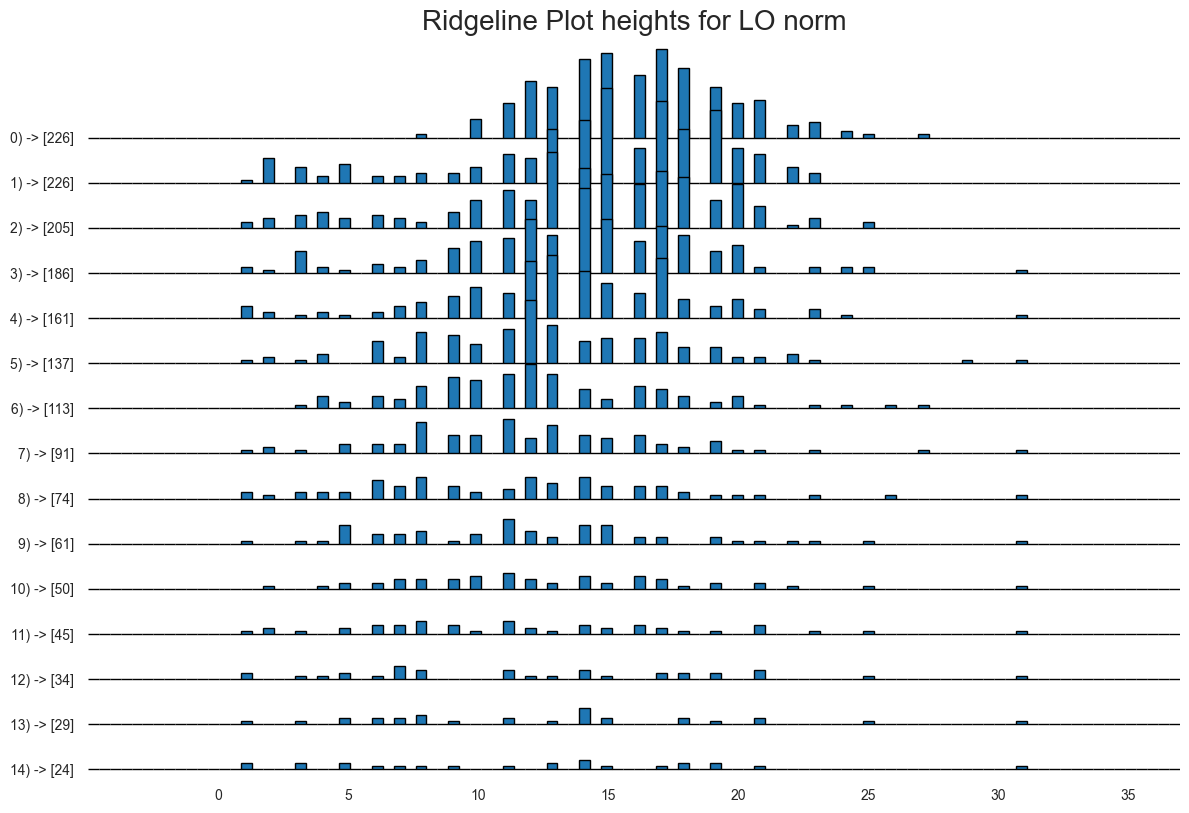

In [33]:
draw_single_ridgeline_plot(
    data_vis=data_vis_LO, data_decr="LO norm",
    fist_step_no=0, last_step_no=15,
    vis_data_name="heights", vis_data_lim=40,
)

# Ridgeline Plot for LI data

<Figure size 640x480 with 0 Axes>

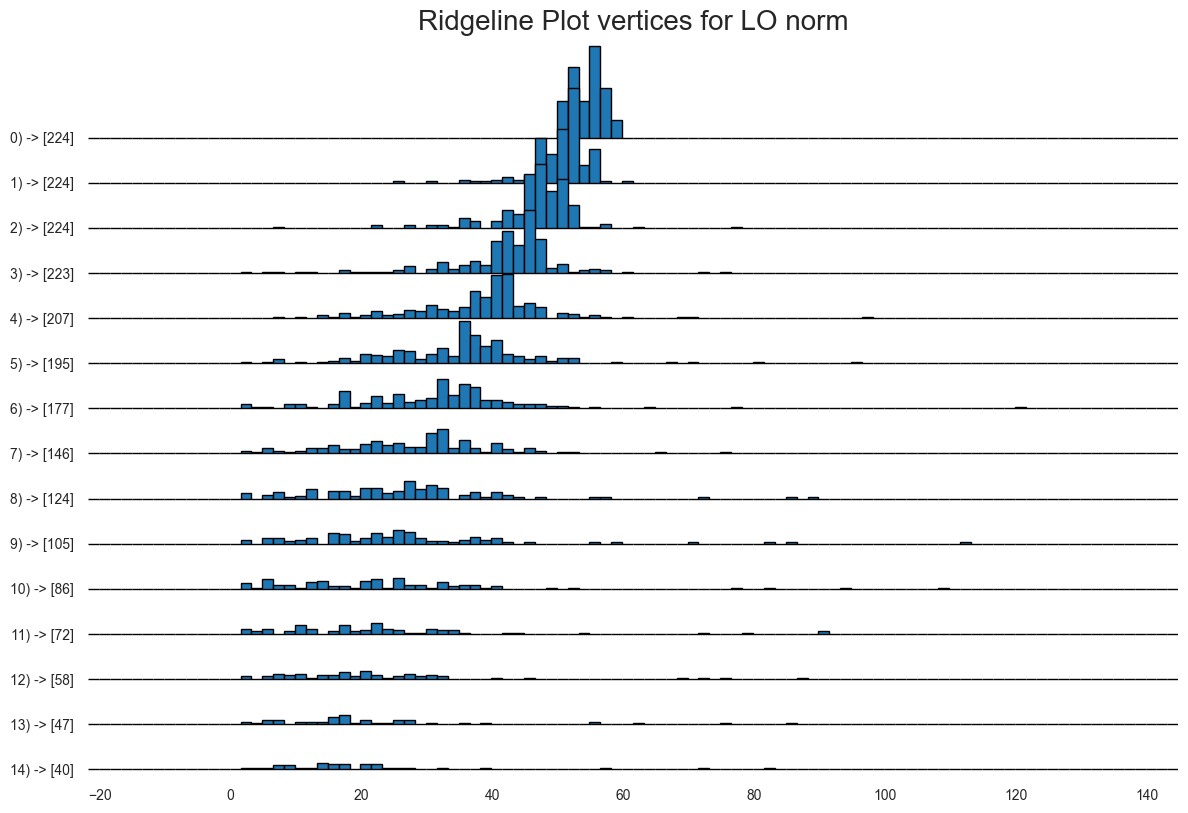

In [35]:
draw_single_ridgeline_plot(
    data_vis=data_vis_LI, data_decr="LO norm",
    fist_step_no=0, last_step_no=15,
    vis_data_name="vertices", vis_data_lim=125,
)

<Figure size 640x480 with 0 Axes>

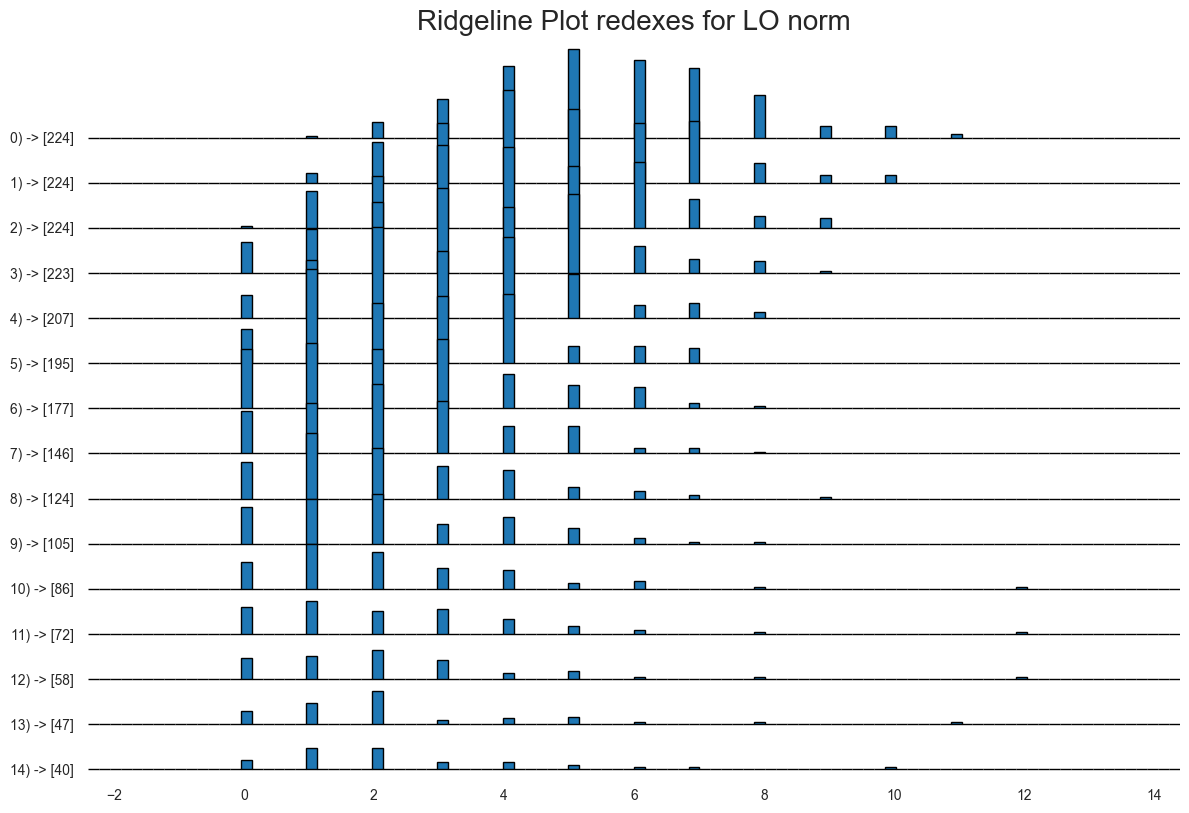

In [36]:
draw_single_ridgeline_plot(
    data_vis=data_vis_LI, data_decr="LO norm",
    fist_step_no=0, last_step_no=15,
    vis_data_name="redexes", vis_data_lim=40,
)

<Figure size 640x480 with 0 Axes>

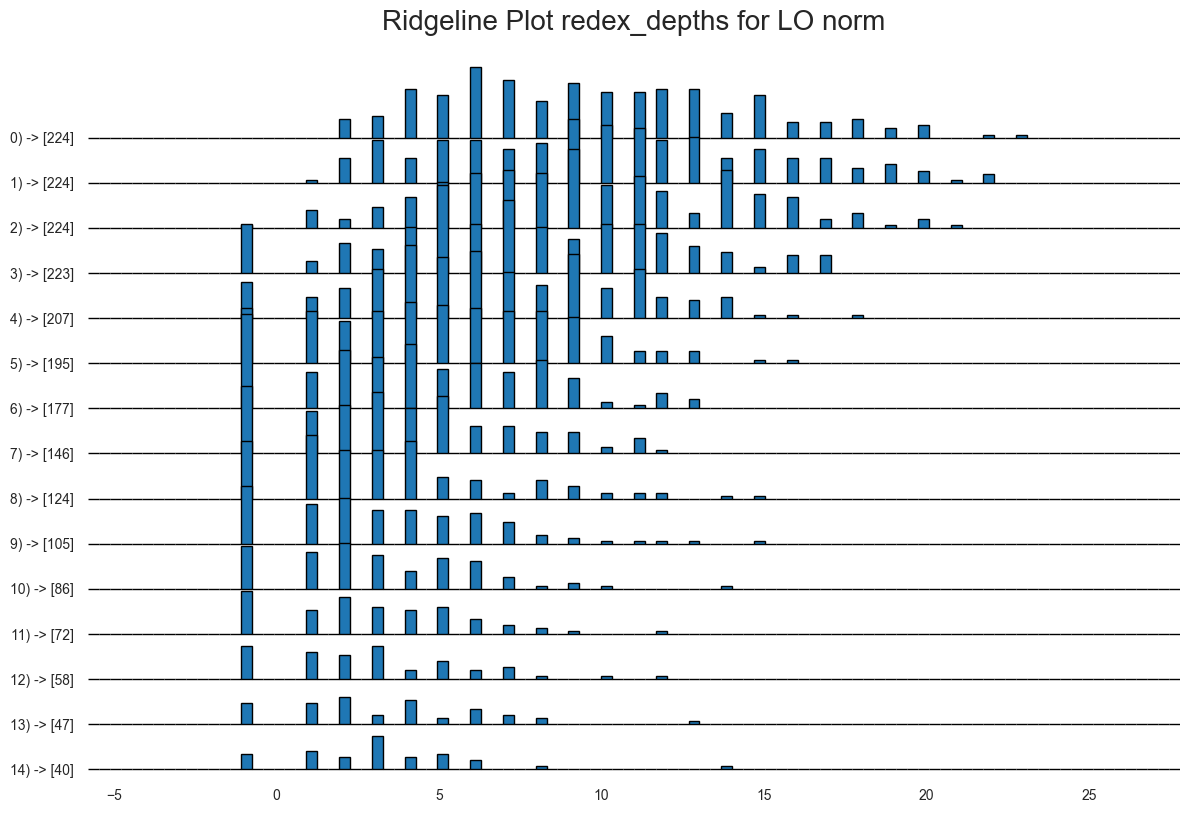

In [37]:
draw_single_ridgeline_plot(
    data_vis=data_vis_LI, data_decr="LO norm",
    fist_step_no=0, last_step_no=15,
    vis_data_name="redex_depths", vis_data_lim=25,
)

<Figure size 640x480 with 0 Axes>

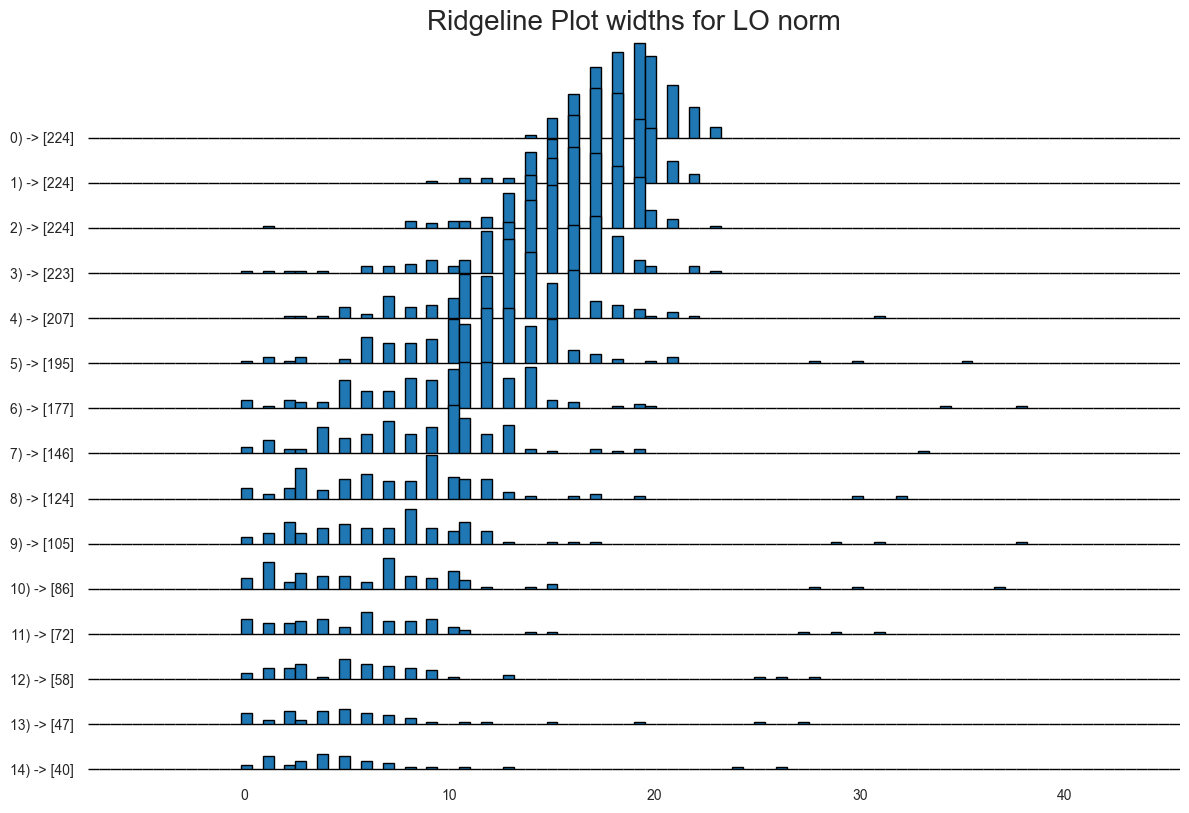

In [38]:
draw_single_ridgeline_plot(
    data_vis=data_vis_LI, data_decr="LO norm",
    fist_step_no=0, last_step_no=15,
    vis_data_name="widths", vis_data_lim=80,
)

<Figure size 640x480 with 0 Axes>

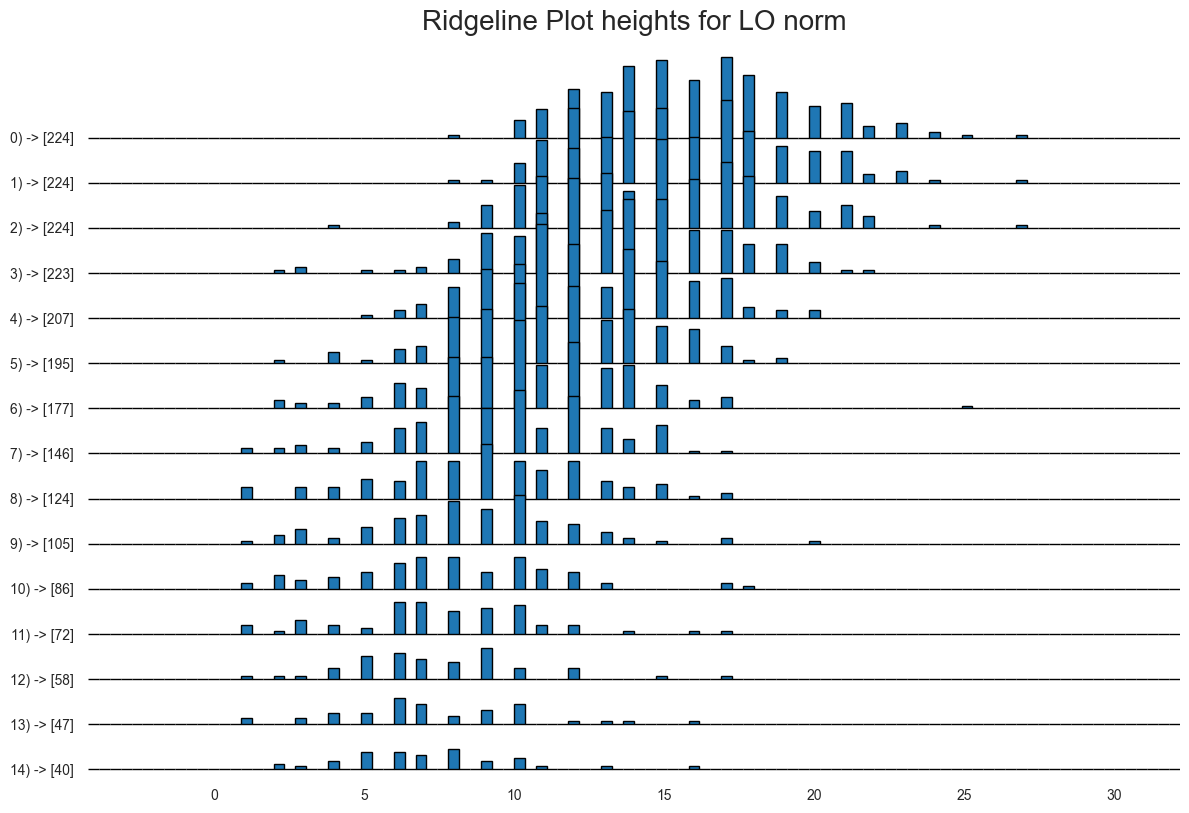

In [39]:
draw_single_ridgeline_plot(
    data_vis=data_vis_LI, data_decr="LO norm",
    fist_step_no=0, last_step_no=15,
    vis_data_name="heights", vis_data_lim=40,
)

# Visualize both LO & LI

In [40]:
data_vis_comb_LI_LO = {
    "step": [], "step_count": [],
    "count_terms_LO": [], "vertices_LO": [], "redexes_LO": [], "redex_depths_LO": [],
    "redex_indexes_LO": [], "heights_LO": [], "widths_LO": [], "steps_time_LO": [],
    "count_terms_LI": [], "vertices_LI": [], "redexes_LI": [], "redex_depths_LI": [],
    "redex_indexes_LI": [], "heights_LI": [], "widths_LI": [], "steps_time_LI": []
}

params_lst = ["vertices", "redexes", "redex_depths", "redex_indexes", "heights", "widths", "steps_time"]
steps_lst = list(range(max(
    max([len(record["vertices"]) for record in data_LO if record]),
    max([len(record["vertices"]) for record in data_LI if record])
)))

global_inx = 0
for step_no in steps_lst:
    step_data_vis_LO = data_vis_LO[[step_no_ == step_no for step_no_ in data_vis_LO["step"]]].reset_index(drop=True).to_dict()
    step_data_vis_LI = data_vis_LI[[step_no_ == step_no for step_no_ in data_vis_LI["step"]]].reset_index(drop=True).to_dict()

    for inx in range(min(len(step_data_vis_LO["step"]), len(step_data_vis_LI["step"]))):
        data_vis_comb_LI_LO["step"].append(step_no)

        if inx < len(step_data_vis_LO["step"]):
            for key_ in params_lst:
                data_vis_comb_LI_LO[key_ + "_LO"].append(step_data_vis_LO[key_][inx])
            data_vis_comb_LI_LO["count_terms_LO"].append(step_data_vis_LO["count_terms"][inx])
        else:
            for key_ in params_lst:
                data_vis_comb_LI_LO[key_ + "_LO"].append(None)
            data_vis_comb_LI_LO["count_terms_LO"].append(data_vis_comb_LI_LO["count_terms_LO"][-1])

        if inx < len(step_data_vis_LI["step"]):
            for key_ in params_lst:
                data_vis_comb_LI_LO[key_ + "_LI"].append(step_data_vis_LI[key_][inx])
            data_vis_comb_LI_LO["count_terms_LI"].append(step_data_vis_LI["count_terms"][inx])
        else:
            for key_ in params_lst:
                data_vis_comb_LI_LO[key_ + "_LI"].append(None)
            data_vis_comb_LI_LO["count_terms_LI"].append(data_vis_comb_LI_LO["count_terms_LI"][-1])

        data_vis_comb_LI_LO["step_count"].append(
            f"{step_no} -> LO_[{data_vis_comb_LI_LO['count_terms_LO'][global_inx]}] LI_[{data_vis_comb_LI_LO['count_terms_LI'][global_inx]}]")
        global_inx += 1

data_vis_comb_LI_LO = pd.DataFrame(data_vis_comb_LI_LO)

In [41]:
data_vis_comb_LI_LO.head()

,step,step_count,count_terms_LO,vertices_LO,redexes_LO,redex_depths_LO,redex_indexes_LO,heights_LO,widths_LO,steps_time_LO,count_terms_LI,vertices_LI,redexes_LI,redex_depths_LI,redex_indexes_LI,heights_LI,widths_LI,steps_time_LI
0,0,0 -> LO_[226] LI_[224],226,53,3,1,1,15,21,0.0,224,53,3,4,12,15,21,0.0
1,0,0 -> LO_[226] LI_[224],226,54,6,2,2,13,17,0.0,224,54,6,7,10,13,17,0.0
2,0,0 -> LO_[226] LI_[224],226,56,6,2,2,18,22,0.0,224,56,6,7,7,18,22,0.0
3,0,0 -> LO_[226] LI_[224],226,51,2,6,6,14,19,0.0,224,51,2,9,9,14,19,0.0
4,0,0 -> LO_[226] LI_[224],226,51,5,3,3,11,17,0.0,224,51,5,8,22,11,17,0.0


In [44]:
def draw_two_ridgeline_plot(
        data_vis, data_decr="LO vs LI norm",
        fist_step_no=0, last_step_no=20,
        vis_data_name_0="vertices_LO", vis_data_name_1="vertices_LI",
        vis_data_lim_0=100, vis_data_lim_1=100,
):
    selected_data = [fist_step_no <= step_no_ < last_step_no for step_no_ in data_vis["step"]]
    tmp_data_vis = data_vis[selected_data].copy(deep=True)
    cat_steps = []
    for var_ in list(tmp_data_vis['step_count']):
        if var_ not in cat_steps:
            cat_steps.append(var_)
    cat_steps = pd.api.types.CategoricalDtype(cat_steps)
    tmp_data_vis['step_count'] = tmp_data_vis['step_count'].astype(cat_steps)
    if vis_data_lim_0:
        tmp_data_vis = tmp_data_vis[[rec_ < vis_data_lim_0 for rec_ in tmp_data_vis[vis_data_name_0]]]

    if vis_data_lim_1:
        tmp_data_vis = tmp_data_vis[[rec_ < vis_data_lim_1 for rec_ in tmp_data_vis[vis_data_name_1]]]

    plt.figure()

    joyplot(
        data=tmp_data_vis[[vis_data_name_0, vis_data_name_1, 'step_count']],
        by='step_count',
        column=[vis_data_name_0, vis_data_name_1],
        color=['#686de0', '#eb4d4b'],
        legend=True,
        alpha=0.7,
        hist=True,
        bins=100,
        figsize=(12, 8)
    )

    plt.title(f"Ridgeline Plot {vis_data_name_0} & {vis_data_name_1} for {data_decr}", fontsize=20)
    plt.show()

<Figure size 640x480 with 0 Axes>

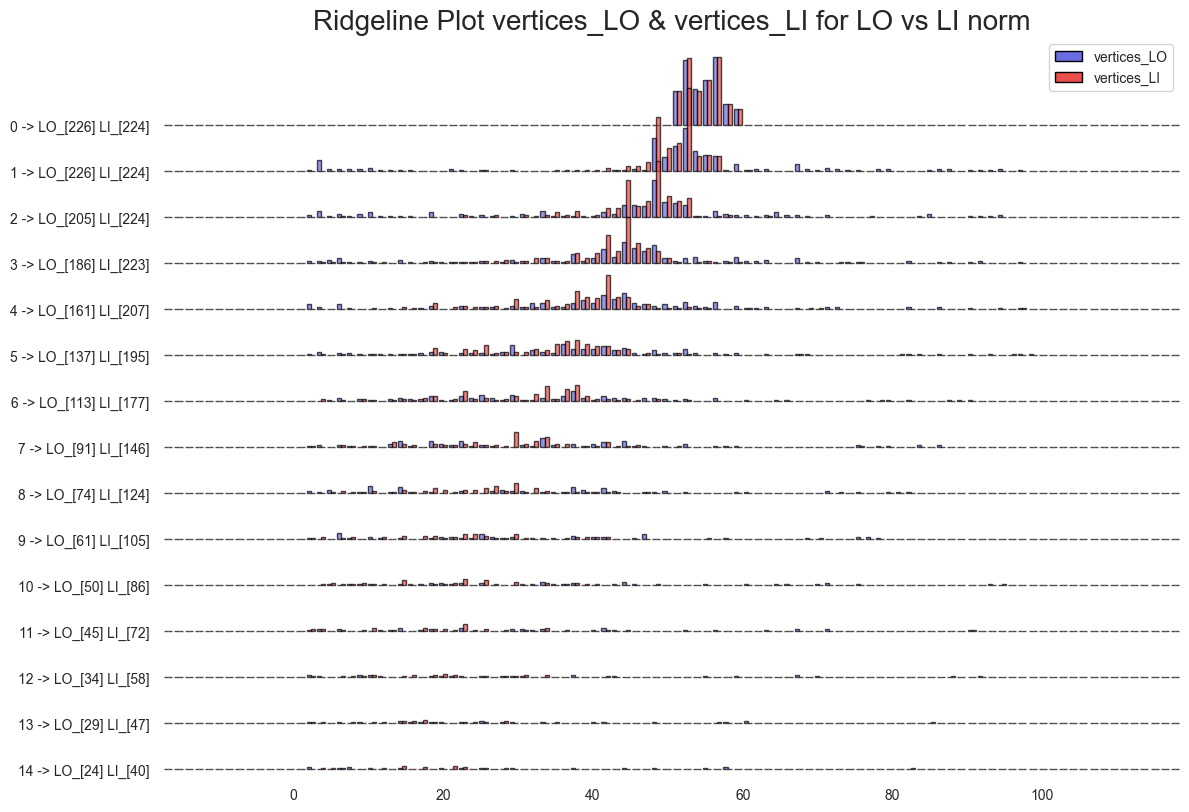

In [45]:
draw_two_ridgeline_plot(
    data_vis=data_vis_comb_LI_LO, data_decr="LO vs LI norm",
    fist_step_no=0, last_step_no=15,
    vis_data_name_0="vertices_LO", vis_data_name_1="vertices_LI",
    vis_data_lim_0=100, vis_data_lim_1=100,
)

<Figure size 640x480 with 0 Axes>

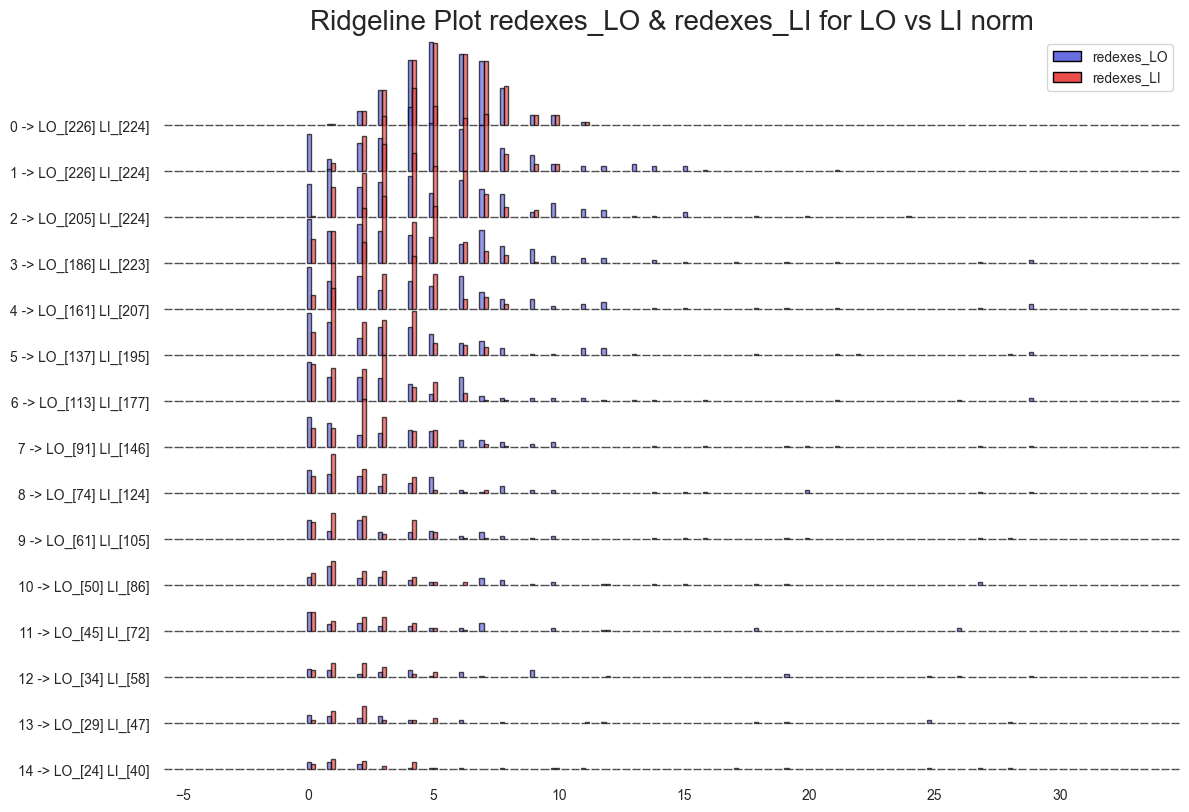

In [47]:
draw_two_ridgeline_plot(
    data_vis=data_vis_comb_LI_LO, data_decr="LO vs LI norm",
    fist_step_no=0, last_step_no=15,
    vis_data_name_0="redexes_LO", vis_data_name_1="redexes_LI",
    vis_data_lim_0=30, vis_data_lim_1=30,
)

<Figure size 640x480 with 0 Axes>

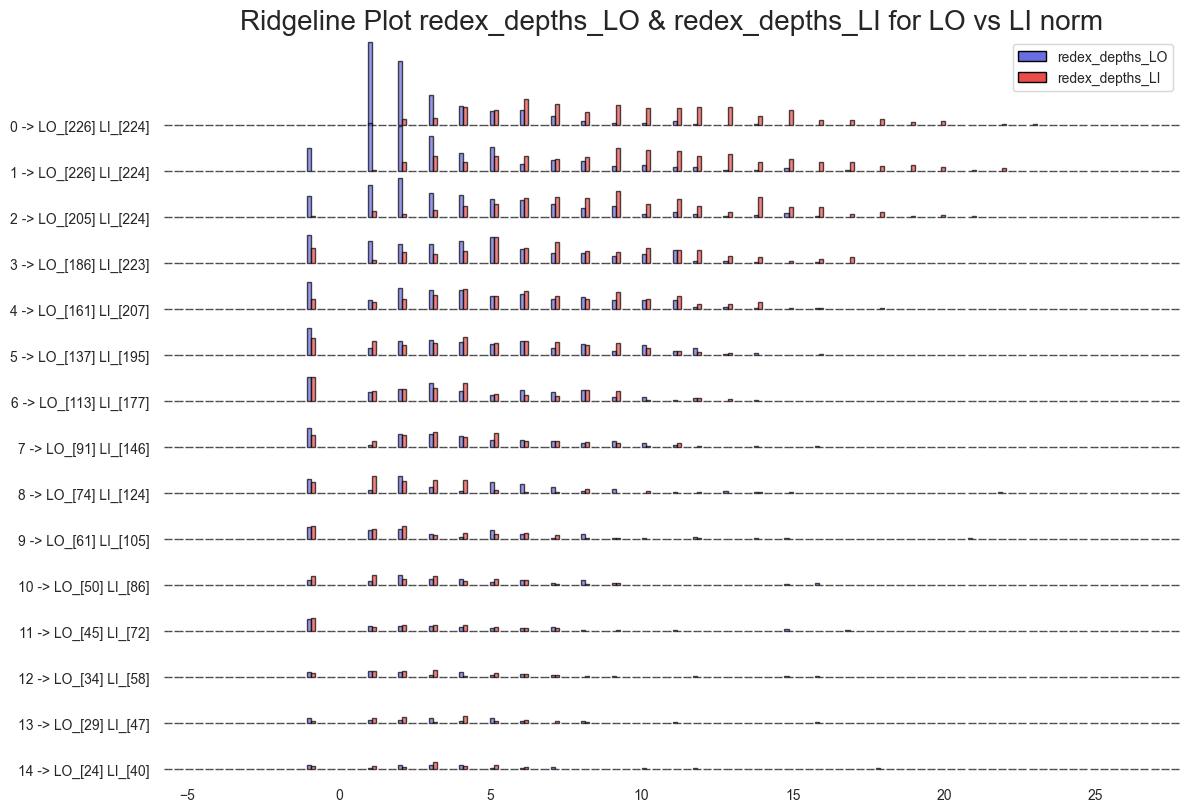

In [48]:
draw_two_ridgeline_plot(
    data_vis=data_vis_comb_LI_LO, data_decr="LO vs LI norm",
    fist_step_no=0, last_step_no=15,
    vis_data_name_0="redex_depths_LO", vis_data_name_1="redex_depths_LI",
    vis_data_lim_0=30, vis_data_lim_1=30,
)

<Figure size 640x480 with 0 Axes>

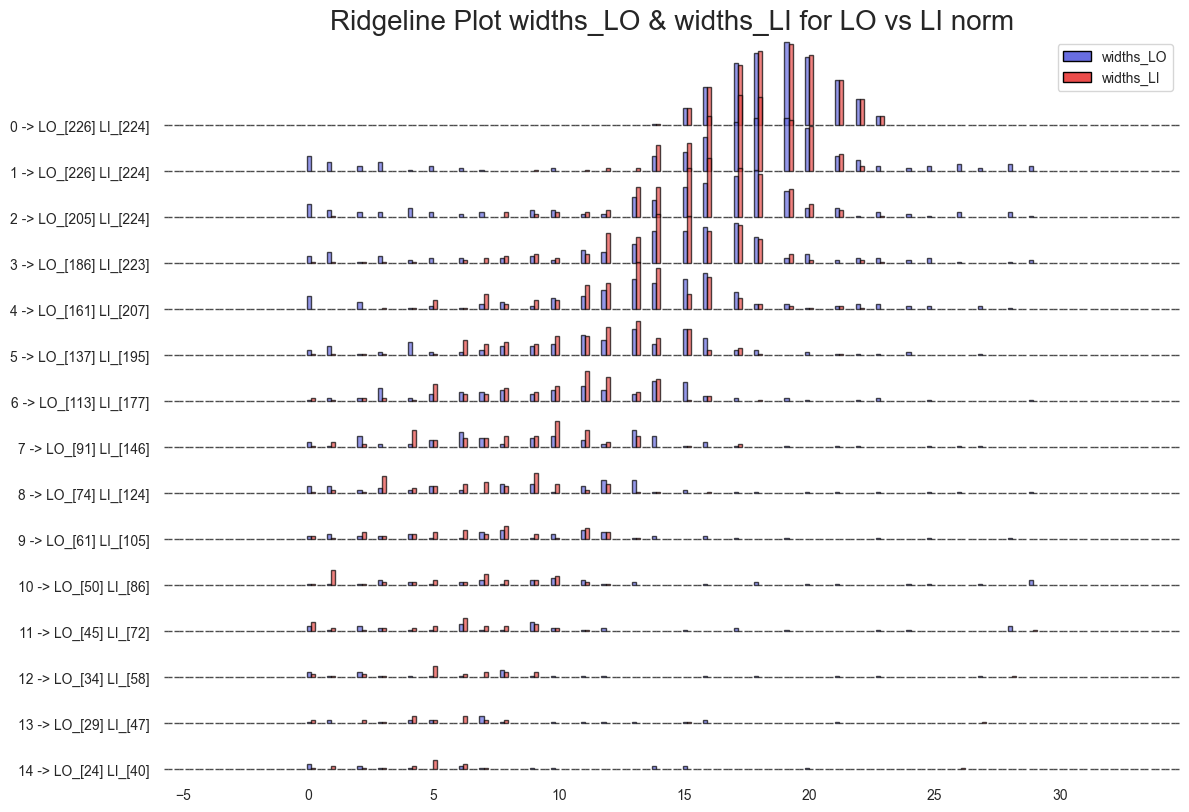

In [49]:
draw_two_ridgeline_plot(
    data_vis=data_vis_comb_LI_LO, data_decr="LO vs LI norm",
    fist_step_no=0, last_step_no=15,
    vis_data_name_0="widths_LO", vis_data_name_1="widths_LI",
    vis_data_lim_0=30, vis_data_lim_1=30,
)

<Figure size 640x480 with 0 Axes>

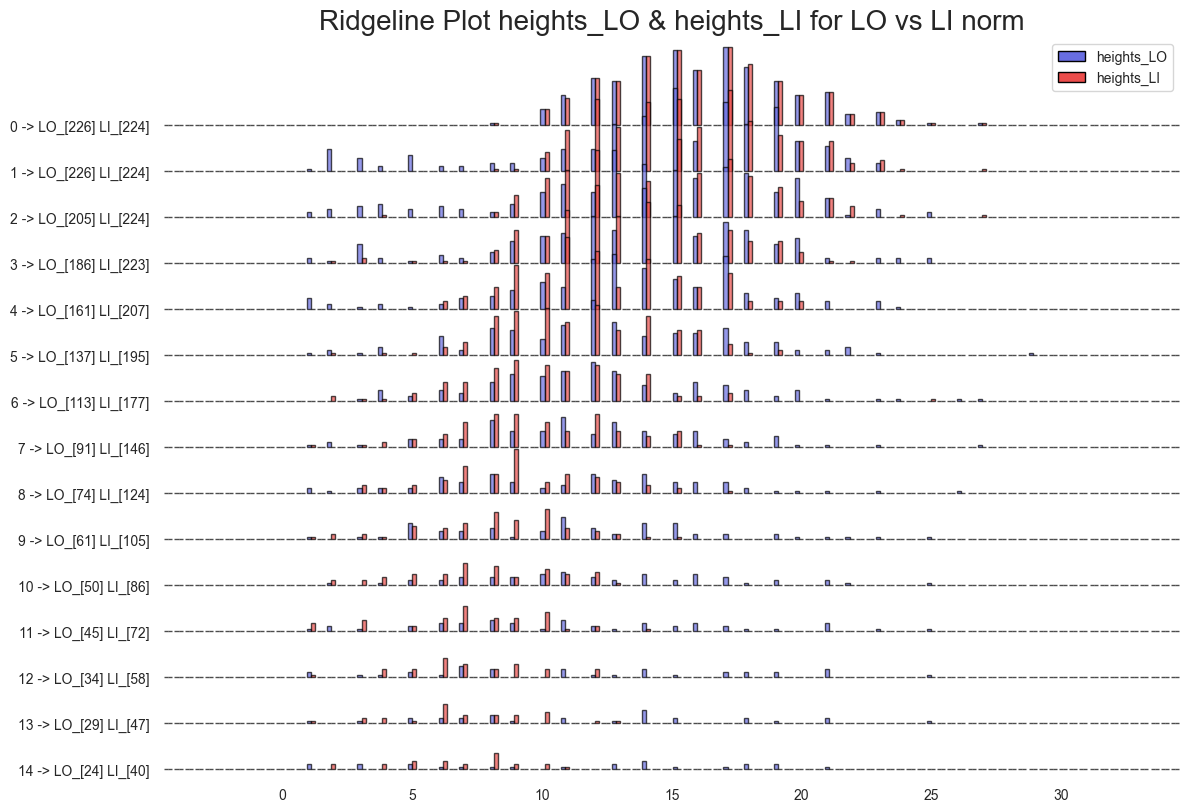

In [51]:
draw_two_ridgeline_plot(
    data_vis=data_vis_comb_LI_LO, data_decr="LO vs LI norm",
    fist_step_no=0, last_step_no=15,
    vis_data_name_0="heights_LO", vis_data_name_1="heights_LI",
    vis_data_lim_0=30, vis_data_lim_1=30,
)